### Again, on the same dataset. Cluster similar houses together.
### Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt



>Data cleaning & getting rid of irrelevant information before clustering

>Finding the optimal value of k

>Storing cluster to which the house belongs along with the data

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('TestData.csv')

In [3]:
dataset

,S.NO.,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [4]:
data=dataset.iloc[:,1:7]

In [5]:
data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2
...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2
641,377.148,4,10,1,1,1
642,740.064,13,14,1,1,1
643,1707.840,3,14,3,2,2


In [6]:
from sklearn.decomposition import PCA

In [7]:
pca=PCA(2)

In [8]:
df_decomposed=pd.DataFrame(pca.fit_transform(data))

In [9]:
df_decomposed.columns

RangeIndex(start=0, stop=2, step=1)

In [10]:
df_decomposed

,0,1
0,-349.968285,-4.682489
1,607.134827,-4.967581
2,-389.104649,-2.903408
3,-68.886263,-5.272438
4,-559.868480,6.573324
...,...,...
640,-168.490496,4.351670
641,-1150.510376,0.578561
642,-787.580936,8.223959
643,180.187642,0.565680


In [11]:
import matplotlib.pyplot as plt

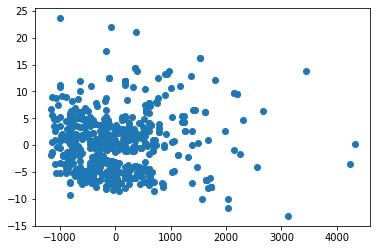

In [12]:
plt.scatter(df_decomposed[0],df_decomposed[1])

In [13]:
data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2
...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2
641,377.148,4,10,1,1,1
642,740.064,13,14,1,1,1
643,1707.840,3,14,3,2,2


In [14]:
from sklearn.cluster import KMeans

In [15]:
error=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    error.append(kmeans.inertia_)

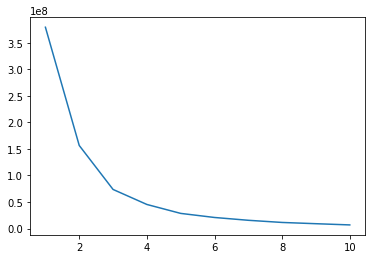

In [16]:
plt.plot([i for i in range(1,11)],error)

In [17]:
error


[379266955.4855327,
 156514488.79683942,
 73677399.17206024,
 45383341.13820531,
 28558082.136747003,
 20871235.82011973,
 15565385.940073136,
 11492900.950125825,
 9128909.856099568,
 6851854.054338917]

In [18]:
kmeans=KMeans(n_clusters=3)

In [19]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [20]:
kmeans.labels_

array([1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0,
       1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2,
       0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2,

In [21]:
data['cluster']=kmeans.labels_

In [22]:
data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,cluster
0,1177.698,2,7,2,2,2,1
1,2134.800,5,7,4,2,2,2
2,1138.560,5,7,2,2,1,1
3,1458.780,2,7,3,2,2,2
4,967.776,11,14,3,2,2,1
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,2
641,377.148,4,10,1,1,1,1
642,740.064,13,14,1,1,1,1
643,1707.840,3,14,3,2,2,2
